In [ ]:
#Importing libraries required
import pandas as pd
import numpy as np
import seaborn as sns
from colorama import Fore, Back, Style
import altair as alt
import matplotlib.pyplot as plt
import matplotlib
from vega_datasets import data
import warnings

In [ ]:
#Uploading dataset
df = pd.read_csv('NYPD_Arrests_Data__Historic_.csv')

#View dataset NYC Arrest
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,236791704,11/22/2021,581.0,NaN,NaN,NaN,PL 2225001,M,M,28,0.0,45-64,M,BLACK,997427.0,230378.0,40.799009,-73.952409,POINT (-73.95240854099995 40.799008797000056)
1,237354740,12/04/2021,153.0,RAPE 3,104.0,RAPE,PL 1302502,F,B,41,0.0,25-44,M,WHITE HISPANIC,1013232.0,236725.0,40.816392,-73.895296,POINT (-73.89529641399997 40.816391847000034)
2,236081433,11/09/2021,681.0,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,Q,113,0.0,25-44,M,BLACK,1046367.0,186986.0,40.679700,-73.776047,POINT (-73.77604736799998 40.67970040800003)
3,32311380,06/18/2007,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,Q,27,1.0,18-24,M,BLACK,NaN,NaN,NaN,NaN,NaN
4,192799737,01/26/2019,177.0,SEXUAL ABUSE,116.0,SEX CRIMES,PL 1306503,F,M,25,0.0,45-64,M,BLACK,1000555.0,230994.0,40.800694,-73.941109,POINT (-73.94110928599997 40.800694331000045)


# Exploratory Data Analysis

In [ ]:
#Dataset period covering
datestart=df["ARREST_DATE"].min()
dateend=df["ARREST_DATE"].max()
print(Fore.RED +"Dataset FROM date:",Fore.BLUE +datestart)
print(Fore.RED +"Dataset TO date:",Fore.BLUE +dateend)

Dataset FROM date: 01/01/2006
Dataset TO date: 12/31/2021


In [ ]:
#Number of rows and columns in dataset
df.shape

(3855926, 19)

In [ ]:
#Basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855926 entries, 0 to 3855925
Data columns (total 19 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ARREST_KEY         int64  
 1   ARREST_DATE        object 
 2   PD_CD              float64
 3   PD_DESC            object 
 4   KY_CD              float64
 5   OFNS_DESC          object 
 6   LAW_CODE           object 
 7   LAW_CAT_CD         object 
 8   ARREST_BORO        object 
 9   ARREST_PRECINCT    int64  
 10  JURISDICTION_CODE  float64
 11  AGE_GROUP          object 
 12  PERP_SEX           object 
 13  PERP_RACE          object 
 14  X_COORD_CD         float64
 15  Y_COORD_CD         float64
 16  Latitude           float64
 17  Longitude          float64
 18  Lon_Lat            object 
dtypes: float64(7), int64(2), object(10)
memory usage: 558.9+ MB


In [ ]:
#Describing dataset
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,3.855926e+06,3.855681e+06,3.847234e+06,3.855926e+06,3.855920e+06,3.855925e+06,3.855925e+06,3.855925e+06,3.855924e+06
mean,1.238046e+08,4.992386e+02,2.939317e+02,6.098830e+01,1.335777e+00,1.005359e+06,2.144021e+05,4.075494e+01,-7.392377e+01
std,5.508339e+07,2.678198e+02,1.734118e+02,3.449450e+01,9.573764e+00,2.033708e+04,1.646134e+05,4.449315e-01,7.339602e-02
min,9.926901e+06,0.000000e+00,1.010000e+02,1.000000e+00,0.000000e+00,9.133570e+05,1.211310e+05,4.049891e+01,-7.425494e+01
25%,8.216320e+07,2.590000e+02,1.260000e+02,3.300000e+01,0.000000e+00,9.924330e+05,1.866640e+05,4.067896e+01,-7.397051e+01
50%,1.368443e+08,5.030000e+02,3.410000e+02,6.000000e+01,0.000000e+00,1.004837e+06,2.082400e+05,4.073822e+01,-7.392569e+01
75%,1.635497e+08,7.480000e+02,3.480000e+02,8.800000e+01,0.000000e+00,1.016177e+06,2.364750e+05,4.081573e+01,-7.388466e+01
max,2.385139e+08,9.970000e+02,9.950000e+02,1.230000e+02,9.700000e+01,1.067302e+06,8.202360e+06,6.208307e+01,-7.368178e+01


In [ ]:
#Datatypes of each variable
df.dtypes

ARREST_KEY             int64
ARREST_DATE           object
PD_CD                float64
PD_DESC               object
KY_CD                float64
OFNS_DESC             object
LAW_CODE              object
LAW_CAT_CD            object
ARREST_BORO           object
ARREST_PRECINCT        int64
JURISDICTION_CODE    float64
AGE_GROUP             object
PERP_SEX              object
PERP_RACE             object
X_COORD_CD           float64
Y_COORD_CD           float64
Latitude             float64
Longitude            float64
Lon_Lat               object
dtype: object

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

No duplicated values found

In [ ]:
#Checking for NULL values
nulls=df.isnull().sum()
nulls.sort_values(ascending=False)

LAW_CAT_CD           16247
PD_DESC               8692
KY_CD                 8692
OFNS_DESC             8692
PD_CD                  245
LAW_CODE               128
AGE_GROUP               17
JURISDICTION_CODE        6
Lon_Lat                  2
Longitude                2
X_COORD_CD               1
ARREST_BORO              1
Latitude                 1
Y_COORD_CD               1
ARREST_KEY               0
PERP_RACE                0
PERP_SEX                 0
ARREST_DATE              0
ARREST_PRECINCT          0
dtype: int64

Variables with the largest population of missing values:

PD_DESC              	
KY_CD                	
OFNS_DESC            	
LAW_CAT_CD           	

In [ ]:
#Correlation between variables
df.corr()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
ARREST_KEY,1.000000,-0.112727,-0.108370,0.020035,0.007759,-0.003929,-0.030918,-0.031062,-0.004352
PD_CD,-0.112727,1.000000,0.300893,0.009643,0.008963,-0.002432,0.016458,0.016382,-0.002113
KY_CD,-0.108370,0.300893,1.000000,-0.015397,-0.011288,-0.013041,0.012637,0.012611,-0.012819
ARREST_PRECINCT,0.020035,0.009643,-0.015397,1.000000,-0.034170,0.305023,-0.070783,-0.072317,0.304938
JURISDICTION_CODE,0.007759,0.008963,-0.011288,-0.034170,1.000000,0.000475,0.000871,0.000922,0.000461
X_COORD_CD,-0.003929,-0.002432,-0.013041,0.305023,0.000475,1.000000,0.069025,0.069663,0.999844
Y_COORD_CD,-0.030918,0.016458,0.012637,-0.070783,0.000871,0.069025,1.000000,0.999965,0.085264
Latitude,-0.031062,0.016382,0.012611,-0.072317,0.000922,0.069663,0.999965,1.000000,0.085880
Longitude,-0.004352,-0.002113,-0.012819,0.304938,0.000461,0.999844,0.085264,0.085880,1.000000


<AxesSubplot:>

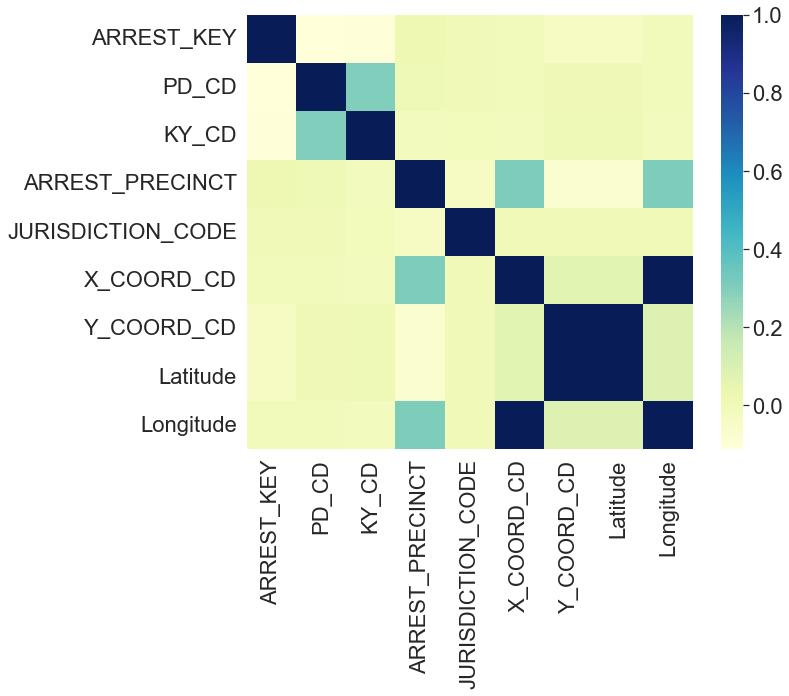

In [ ]:
#Correlation plot for numerical variables
sns.set(rc={"figure.figsize":(10, 8)})
sns.set(font_scale=2)
sns.heatmap(df.corr(), cmap="YlGnBu")

## Dataset modifications

### Our analysis will focus on Pre-pandemic and Post-Pandemic arrest and offenses behavior.
Therefore, we've decided to analyze data belonging to a 5year period that encompasses both: Pre-Pandemnic & Post-Pandemic.

<div class="alert alert-block alert-success"> 
    Our analysis period will be for date range:
    <b>Jan 2017 to Dec 2021</b>
</div>

## Cutting dataframe to date range that will be analyzed

In [ ]:
##Convert Arrest_Date variable (object type) to datetime type
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], errors='coerce')

In [ ]:
##Filter dataset based on start date in ARREST_DATE column for our analysis
start_date='1/1/2017'
df_final = df.loc[(df["ARREST_DATE"]>=start_date)]

In [ ]:
###Number of rows and columns in subset
df_final.shape

(1043535, 19)

In [ ]:
##Making subset new dataset
df=df_final

In [ ]:
###Number of rows and columns of new dataset
df.shape

(1043535, 19)

In [ ]:
#Checking for NULL values
nulls=df.isnull().sum()
nulls.sort_values(ascending=False)

LAW_CAT_CD           7411
PD_DESC              2031
KY_CD                2031
OFNS_DESC            2031
PD_CD                 162
LAW_CODE               45
ARREST_KEY              0
PERP_RACE               0
Longitude               0
Latitude                0
Y_COORD_CD              0
X_COORD_CD              0
ARREST_PRECINCT         0
PERP_SEX                0
AGE_GROUP               0
JURISDICTION_CODE       0
ARREST_DATE             0
ARREST_BORO             0
Lon_Lat                 0
dtype: int64

In [ ]:
##Storing new dataset in drive
df.to_csv(r'C:\Users\kathj\Desktop\College\Baruch College (M.S. in IT, Data Analytics concentration)\4) Fall 2022\CIS9655-Data Visualization\Final Project-NYC Arrest Dataset\NYC_Arrest.csv', index=False)

In [ ]:
# Creating a new dataset for Manhattan only

arrest = pd.read_csv('NYC_Arrest.csv')
arrest_m = arrest[arrest['ARREST_BORO'] == 'M']

### **Manhattan Arrest Analysis**

<AxesSubplot:xlabel='crime_per_year'>

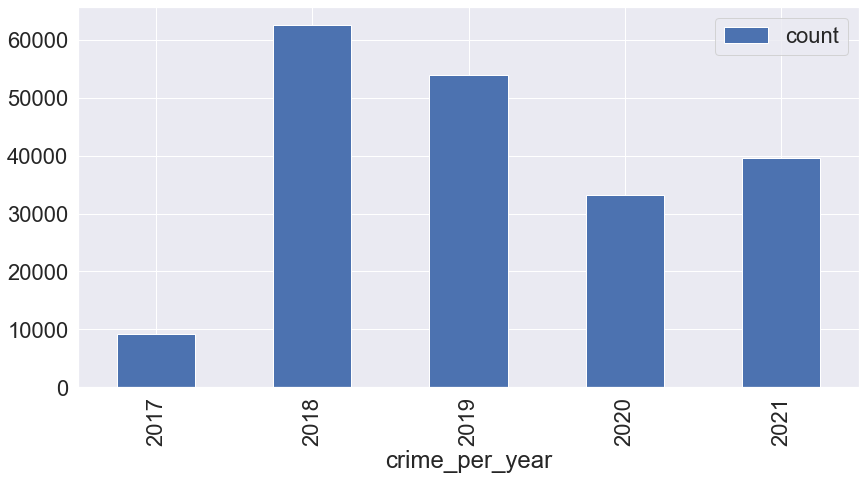

In [ ]:
# Distribution of crime in Manhattan per year
warnings.filterwarnings("ignore")
arrest_m['ARREST_DATE'] = pd.to_datetime(arrest_m['ARREST_DATE'])
arrest_m['crime_per_year'] = arrest_m['ARREST_DATE'].map(lambda dt: dt.strftime('%Y'))
grouped_year = arrest_m.groupby('crime_per_year').size().to_frame("count").reset_index()
grouped_year.plot(kind='bar', x='crime_per_year', y='count', figsize=(14, 7))

In [ ]:
# Defining datasets for before and after Covid

before_covid = arrest_m[(arrest_m['ARREST_DATE'] > "2018-12-31 00:00:00") & (arrest_m['ARREST_DATE'] < "2020-01-01 00:00:00")]
after_covid = arrest_m[(arrest_m['ARREST_DATE'] > "2020-12-31 00:00:00") & (arrest_m['ARREST_DATE'] < "2021-12-31 12:00:00")]

Text(0.5, 0.98, 'Distribution of top-20 crime cases before/after Covid')

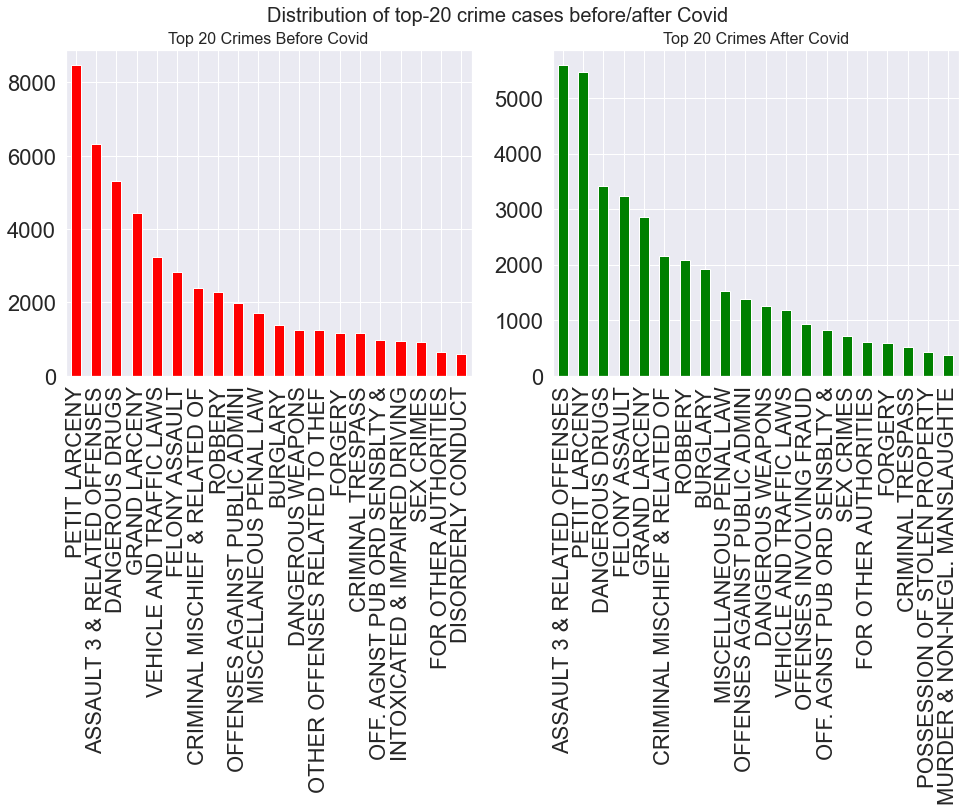

In [ ]:
# Showing the Top-20 crime cases before/after Covid

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,6))

ax=before_covid['OFNS_DESC'].value_counts().head(20).plot(kind='bar',color='red', ax=ax1)
fig = ax.get_figure()
ax1.set_title("Top 20 Crimes Before Covid", size= 16);

ax=after_covid['OFNS_DESC'].value_counts().head(20).plot(kind='bar',color='green', ax=ax2)
fig = ax.get_figure()
ax2.set_title("Top 20 Crimes After Covid", size= 16);
fig.suptitle('Distribution of top-20 crime cases before/after Covid', size= 20)

Text(0.5, 0.98, 'Rape and Murder cases before/after Covid')

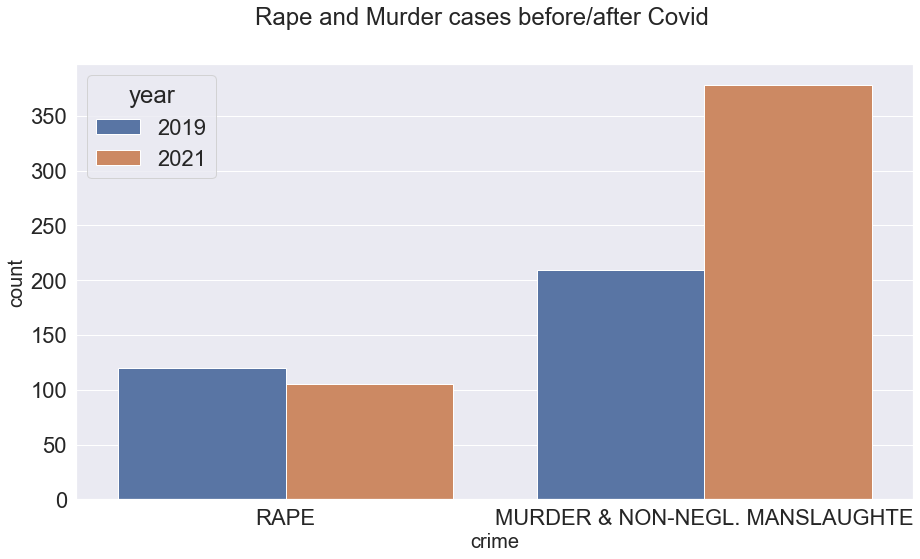

In [ ]:
# Comparing the number of Rape and Murder cases before/after Covid

warnings.filterwarnings("ignore")
violent_crime = ['RAPE', 'MURDER & NON-NEGL. MANSLAUGHTE']
serious_crime = arrest_m.loc[arrest_m['OFNS_DESC'].isin(violent_crime)]
serious_crime['ARREST_DATE'] = pd.to_datetime(serious_crime['ARREST_DATE'])
serious_crime['year'] = serious_crime['ARREST_DATE'].map(lambda dt: dt.strftime('%Y'))
years = ['2019', '2021']
serious_crime=serious_crime[serious_crime['crime_per_year'].isin(years)]

fig, ax = plt.subplots(figsize=(15, 8))

sns.countplot(data=serious_crime, x="OFNS_DESC", hue="year")

fig = ax.get_figure()
ax.set_ylabel("count", size = 20)
ax.set_xlabel("crime", size = 20)
fig.suptitle('Rape and Murder cases before/after Covid', size = 24)